In [52]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [53]:
filename = 'pima_indians_diabetes.csv'
diabetes = np.loadtxt(filename, skiprows=1, delimiter=',')
x = StandardScaler().fit_transform(diabetes[:,:-1])
y = diabetes[:, [-1]]
x_train, x_val_tes, y_train, y_val_tes = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_tes, y_val_tes, test_size=0.5)
X_train = torch.Tensor(x_train)
Y_train = torch.Tensor(y_train)
X_val = torch.Tensor(x_val)
Y_val = torch.Tensor(y_val)
X_test = torch.Tensor(x_test)
Y_test = torch.Tensor(y_test)
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=10, shuffle=True)

In [54]:
# 8 -> 5 -> 5 -> 1
network = nn.Sequential(nn.Linear(8, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 1),
                          nn.Sigmoid())

In [55]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [64]:
loss_function = nn.BCELoss()
# loss_function = nn.CrossEntropyLoss()

In [65]:
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)
# optimizer = torch.optim.SGD(network.parameters(), lr=0.001)

In [66]:
epochs = 2000
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    optimizer.zero_grad()

    predictions = network.forward(inputs)
    loss = loss_function(predictions, outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

Epoch   1: loss 0.45666
Epoch   2: loss 0.46107
Epoch   3: loss 0.45626
Epoch   4: loss 0.45670
Epoch   5: loss 0.45850
Epoch   6: loss 0.45355
Epoch   7: loss 0.45375
Epoch   8: loss 0.45213
Epoch   9: loss 0.45451
Epoch  10: loss 0.45623
Epoch  11: loss 0.45441
Epoch  12: loss 0.45298
Epoch  13: loss 0.45205
Epoch  14: loss 0.45266
Epoch  15: loss 0.44977
Epoch  16: loss 0.45274
Epoch  17: loss 0.45194
Epoch  18: loss 0.45736
Epoch  19: loss 0.45181
Epoch  20: loss 0.44975
Epoch  21: loss 0.45272
Epoch  22: loss 0.44956
Epoch  23: loss 0.45458
Epoch  24: loss 0.44861
Epoch  25: loss 0.44715
Epoch  26: loss 0.45542
Epoch  27: loss 0.44709
Epoch  28: loss 0.45105
Epoch  29: loss 0.45066
Epoch  30: loss 0.44721
Epoch  31: loss 0.45132
Epoch  32: loss 0.44742
Epoch  33: loss 0.45263
Epoch  34: loss 0.44905
Epoch  35: loss 0.44690
Epoch  36: loss 0.44935
Epoch  37: loss 0.44424
Epoch  38: loss 0.44914
Epoch  39: loss 0.44556
Epoch  40: loss 0.44714
Epoch  41: loss 0.44385
Epoch  42: loss 

In [67]:
network.eval()

Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

In [68]:
predictions = network.forward(X_val)
predictions = (predictions >= 0.5)
predictions

tensor([[False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True

In [69]:
accuracy_score(Y_val, predictions.detach().numpy())

0.7142857142857143

In [43]:
cm = confusion_matrix(Y_val, predictions.detach().numpy())
cm

array([[42, 10],
       [ 7, 18]], dtype=int64)

<AxesSubplot: >

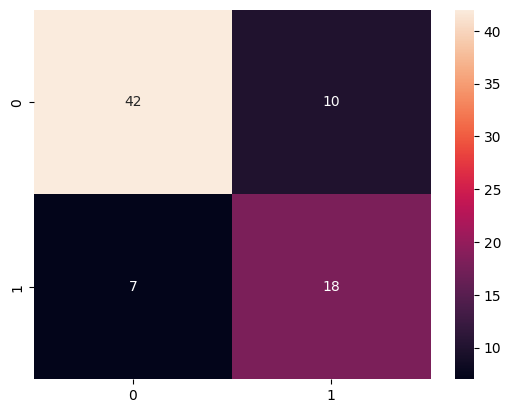

In [45]:
import seaborn as sns
sns.heatmap(cm, annot=True)